Профессия Data Science  
Блок 4. Введение в машинное обучение  
**ML-3. Обучение с учителем: классификация**

---

## **✍ Оглавление:**

2. Логистическая регрессия
3. Метрики классификации. Преимущества и недостатки логистической регрессии
4. Мультиклассовая классификация
5. Практика: логистическая регрессия
6. Деревья решений
7. Введение в ансамбли: бэггинг. Случайный лес

---

## **2. Логистическая регрессия**

**Задача классификации (classification)** — задача, в которой мы пытаемся предсказать класс объекта на основе признаков в наборе данных. То есть задача сводится к предсказанию целевого признака, который является **категориальным**.

Когда классов, которые мы хотим предсказать, только два, классификация называется **бинарной**.

Когда классов, которые мы хотим предсказать, более двух, классификация называется **мультиклассовой (многоклассовой)**.

Что вообще означает «решить задачу классификации»? Это значит построить разделяющую поверхность в пространстве признаков, которая делит пространство на части, каждая из которых соответствует определённому классу. 

Модели, которые решают задачу классификации, называются **классификаторами (classifier)**.

**<center> ОБЩЕЕ ПРЕДСТАВЛЕНИЕ О ЛОГИСТИЧЕСКОЙ РЕГРЕССИИ </center>**

**Логистическая регрессия (Logistic Regression)** — одна из простейших моделей для решения задачи классификации. Несмотря на простоту, модель входит в топ часто используемых алгоритмов классификации в Data Science.

В основе логистической регрессии лежит логистическая функция (logistic function)  — отсюда и название модели. Однако более распространённое название этой функции — **сигмόида (sigmoid)**.

**В чём преимущество этой функции?**
У сигмоиды есть два очень важных для нас свойства:

➔ Значения сигмоиды σ(𝑧) лежат в диапазоне от 0 до 1 при любых значениях
аргумента 𝑧. Какой бы 𝑧 вы ни подставили, число меньше 0 или больше 1
вы не получите.
➔ Сигмоида выдаёт значения σ(𝑧) > 0. 5 при её аргументе 𝑧 > 0, σ(𝑧) < 0. 5,
при 𝑧 < 0 и σ(𝑧) = 0. 5 при 𝑧 = 0.

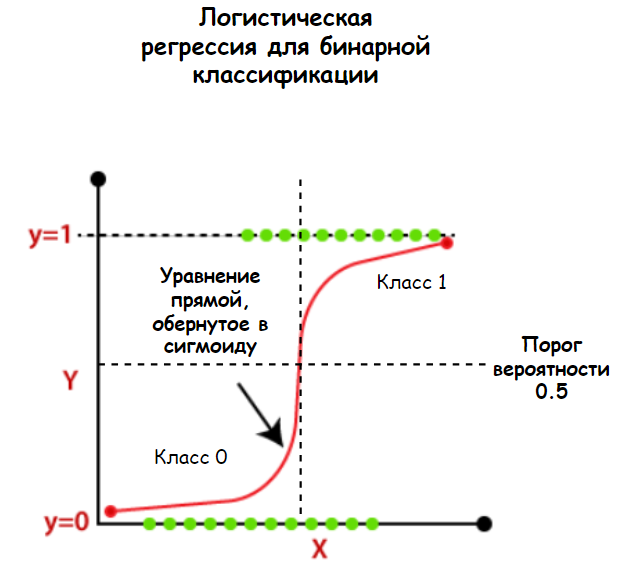

## **3. Метрики классификации. Преимущества и недостатки логистической регрессии**

**1. Матрица ошибок (confusion matrix)** показывает все возможные исходы совпадения и несовпадения предсказания модели с действительностью. Используется для расчёта других метрик.

**2. Accuracy (достоверность)** — это доля правильных ответов модели среди всех
ответов. Правильные ответы — это истинно положительные (True Positive) и
истинно отрицательные ответы (True Negative):

𝑎𝑐𝑐𝑢𝑟𝑎𝑐𝑦 = (𝑇𝑃+𝑇𝑁) / (𝑇𝑃+𝑇𝑁+𝐹𝑁+𝐹P)

В виде диаграммы соотношение количества объектов, классы которых мы угадали и общего количества объектов записывается в следующем виде:

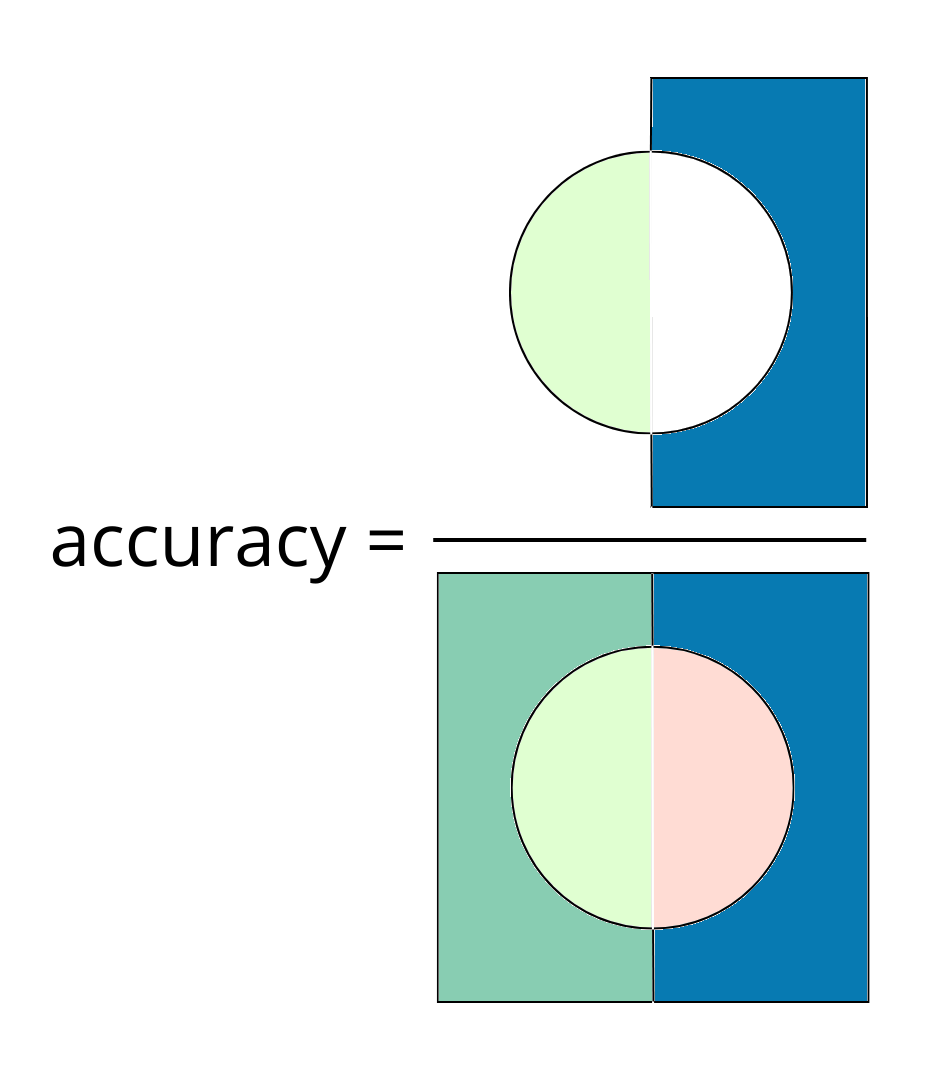

**Интерпретация:** как много (в долях) модель угадала ответов.

Accuracy — самая простая и самая понятная метрика классификации, но у неё есть один существенный недостаток. Она бесполезна, если классы сильно несбалансированы.

**3. Precision (точность), или PPV (Positive Predictive Value)** — это доля объектов, названных классификатором положительными и при этом действительно являющихся таковыми, по отношению ко всем названным положительными объектам.

𝑝𝑟𝑒𝑐𝑖𝑠𝑖𝑜𝑛 = 𝑇𝑃 / (𝑇𝑃+𝐹P)

В виде диаграммы соотношение количества объектов класса 1, которые мы угадали и количества объектов, которые мы приняли за класс 1, записывается следующим образом:

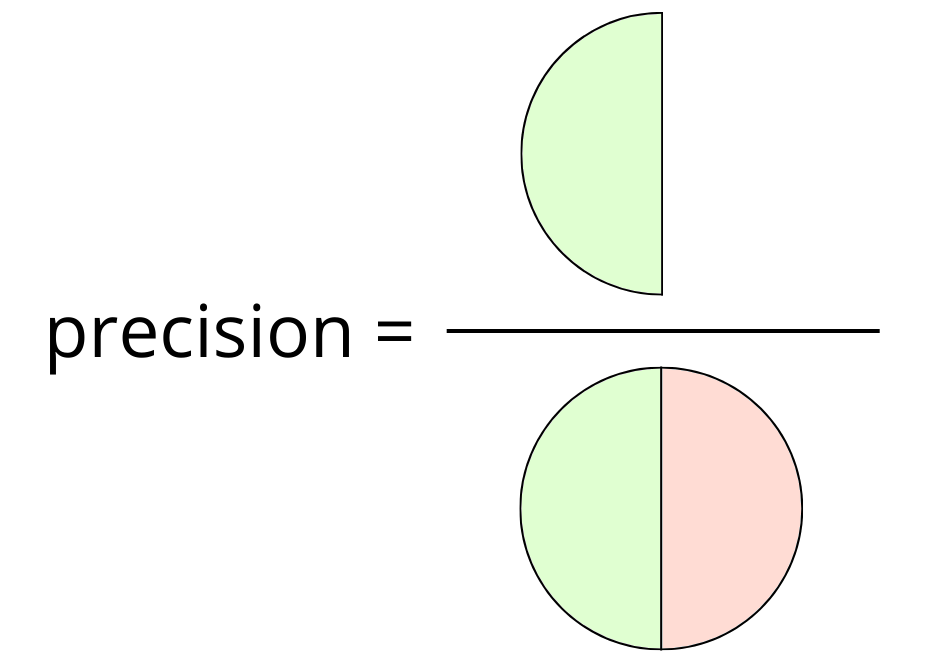

Метрика также изменяется от 0 до 1. 

Интерпретация: способность отделить класс 1 от класса 0. Чем больше precision, тем меньше ложных попаданий. То есть чем ближе precision к 1, тем меньше вероятность модели допустить ошибку I рода.

Именно precision не позволяет записать все ответы в один класс, так как в таком случае резко возрастает значение False Positive и метрика снижается.

**4. Recall (полнота), или TPR (True Positive Rate)** — это доля объектов, названных классификатором положительными и при этом действительно являющихся таковыми, по отношению ко всем объектам положительного класса.

𝑟𝑒𝑐𝑎𝑙𝑙 = 𝑇𝑃 / (𝑇𝑃+𝐹N)

Диаграмма:

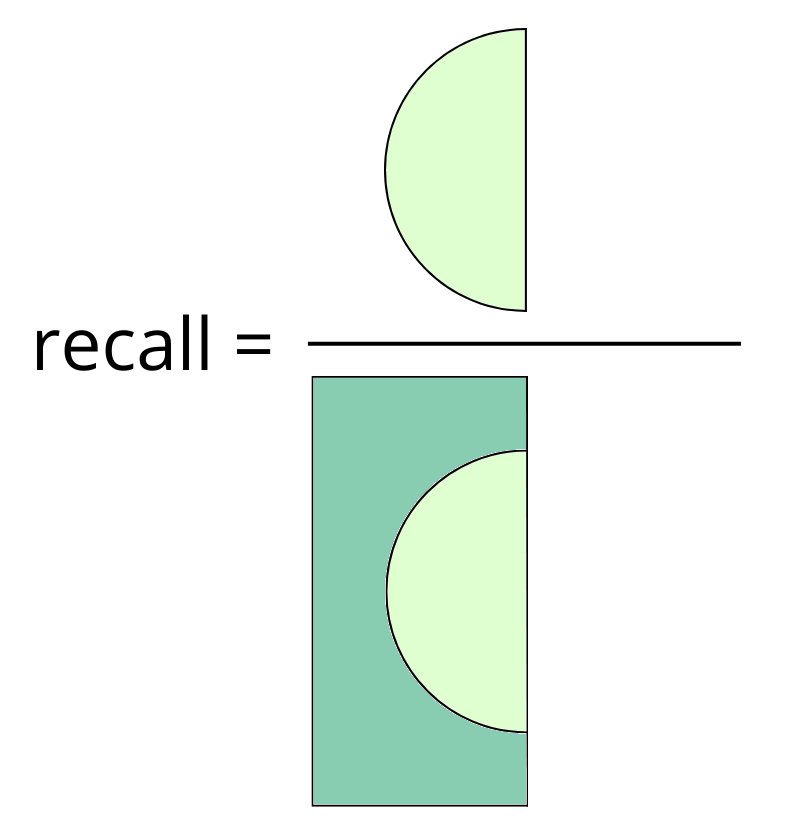

Метрика изменяется от 0 до 1.

**Интерпретация:** способность модели обнаруживать класс 1 вообще, то есть охват класса 1. Заметьте, что метрика зависит от количества ложноотрицательных срабатываний. То есть чем ближе recall к 1, тем меньше вероятность модели допустить ошибку II рода.

Recall очень хорошо себя показывает в задачах, где важно найти как можно больше объектов, принадлежащих к классу 1.

Метрики precision и recall не зависят от сбалансированности классов и в совокупности дают довольно исчерпывающее представление о классификаторе. Однако на практике часто бывает так, что увеличение одной из метрик может привести к уменьшению другой.

**5. 𝐹 β (F-мера) — это взвешенное среднее гармоническое между precision и recall:**

𝐹β = (1 + β2) * (𝑝𝑟𝑒𝑐𝑖𝑠𝑖𝑜𝑛·𝑟𝑒𝑐𝑎𝑙𝑙 / ((β2 𝑝𝑟𝑒𝑐𝑖𝑠𝑖𝑜𝑛) + 𝑟𝑒𝑐𝑎𝑙𝑙))

где β — это вес precision в метрике: чем больше β, тем больший вклад.

**В чём преимущество F1-меры?**

Метрика равна своему максимуму (1), если и precision, и recall равны 1 (то есть когда отсутствуют как ложноположительные, так и ложноотрицательные срабатывания). Но если хотя бы одна из метрик будет близка к 0, то и F1 будет близка к 0. 

**ДОСТОИНСТВА И НЕДОСТАТКИ ЛОГИСТИЧЕСКОЙ РЕГРЕССИИ**

Давайте обобщим всё вышесказанное и приведём достоинства и недостатки логистической регрессии.

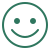

- Простой, интерпретируемый, но в то же время эффективный алгоритм. Благодаря этому он очень популярен в мире машинного обучения.
- Поиск параметров линейный или квадратичный (в зависимости от метода оптимизации), то есть ресурсозатратность алгоритма очень низкая.
- Не требует подбора внешних параметров (гиперпараметров), так как практически не зависит от них.

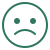

Алгоритм работает хорошо, только когда классы линейно разделимы, что в реальных задачах бывает очень редко. Поэтому обычно данная модель используется в качестве baseline.

In [1]:
# Задание 3.6
from sklearn import metrics
y_true = [0, 0, 1, 1, 1, 1, 0, 1]
y_pred = [0, 1, 0, 0, 1, 1, 0, 1]
 
print(f'{metrics.precision_score(y_true, y_pred):.2f}')

0.75


In [2]:
# Задание 3.7

y_true = [0, 0, 1, 1, 1, 1, 0, 1]
y_pred = [0, 1, 0, 0, 1, 1, 0, 1]
print(f'{metrics.recall_score(y_true, y_pred):.2f}')

0.60


In [3]:
# Задание 3.8

y_true = [0, 0, 1, 1, 1, 1, 0, 1]
y_pred = [0, 1, 0, 0, 1, 1, 0, 1]
print(f'{metrics.f1_score(y_true, y_pred):.2f}')

0.67


## **4. Мультиклассовая классификация**

✍ Ранее мы с вами рассмотрели основы бинарной классификации. Но что делать, когда классов, на которые необходимо разделить данные, больше 2? Например, классификация автомобилей по различным маркам или определение национальности по фотографии и т. д.

В таком случае используется очень простой подход, который называется **«один против всех» (one-vs-over)**.

**Идея** этого подхода очень простая. Если у нас есть k различных классов (k>2), давайте обучим  классификаторов, каждый из которых будет предсказывать вероятности принадлежности каждого объекта к определённому классу.

Например, у нас есть три класса, обозначенные как 0, 1 и 2. Тогда мы обучаем три классификатора: первый из них учится отличать класс 0 от классов 1 и 2, второй — класс 1 от классов 0 и 2, а третий — класс 2 от классов 1 и 0. Таким образом, класс, на который «заточен» классификатор, мы обозначаем как 1, а остальные классы — как 0.

Когда каждая из трёх моделей сделает предсказание вероятностей для объекта, итоговый классификатор будет выдавать класс, который соответствует самой «уверенной» модели.

Схематично это можно представить следующим образом:

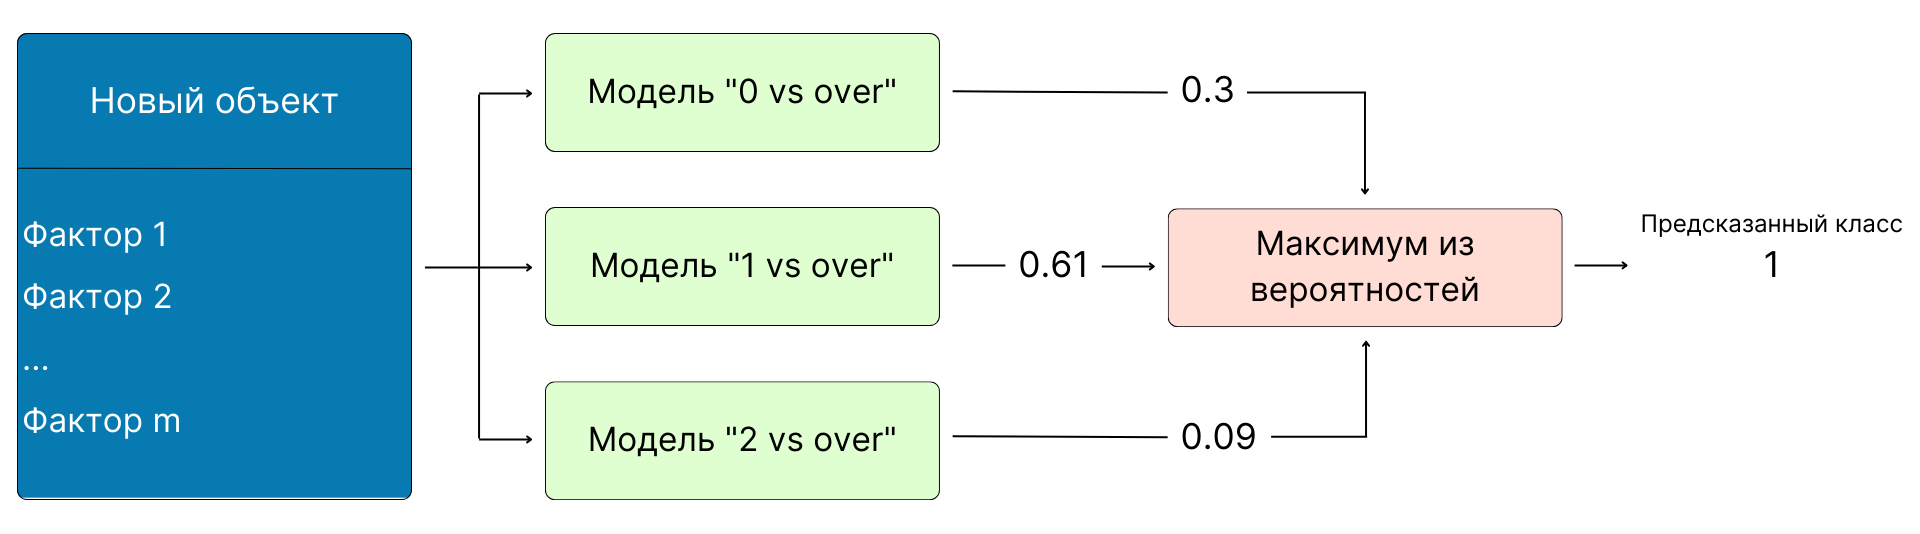

## **5. Практика: логистическая регрессия**

## **6. Деревья решений**

Деревья решений являются одним из наиболее понятных человеку и в то же время мощных алгоритмов принятия решений. К тому же на их основе строятся самые эффективные ансамблевые модели машинного обучения, такие как случайный лес.

Алгоритмы на основе деревьев решений могут использоваться как для решения задач классификации, так и для регрессии. 

Формально структура дерева решений — это **связный ациклический граф**. Что это значит?

**Граф** — это абстрактная топологическая модель, которая состоит из вершин и соединяющих их рёбер.

**Связный граф** — это граф, в котором между любой парой существует направленная связь.

**Ациклический граф** — это граф, в котором отсутствуют циклы, то есть в графе не существует такого пути, по которому можно вернуться в начальную вершину.

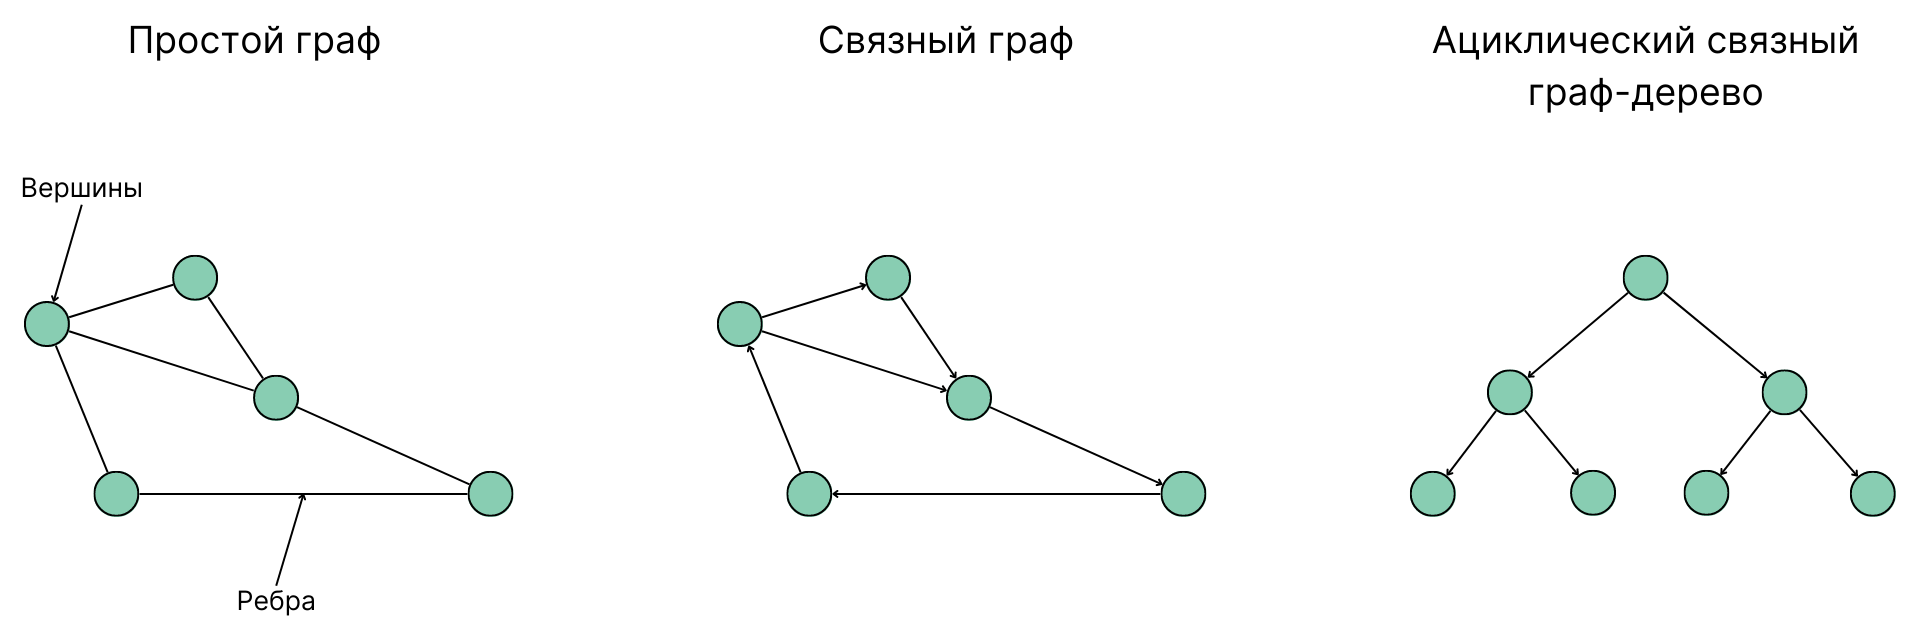

В дереве решений можно выделить три типа вершин:

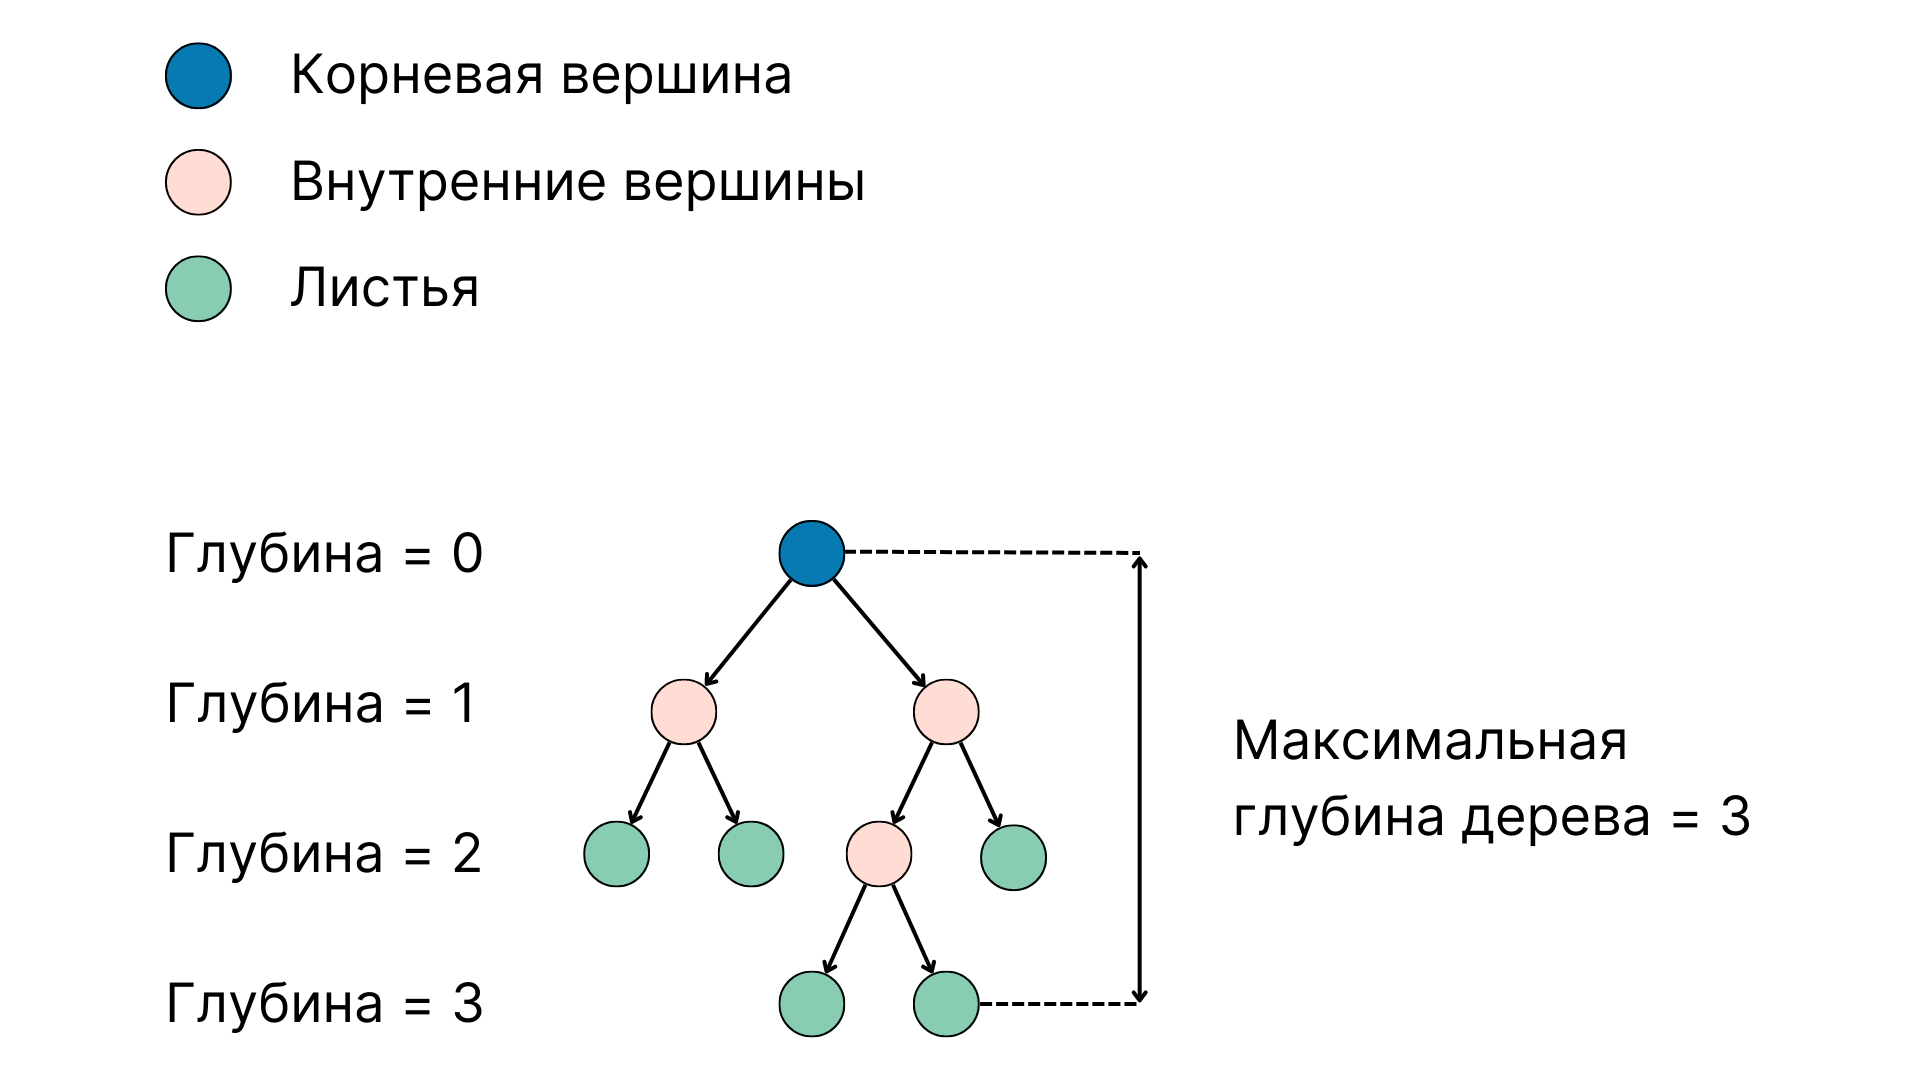

**Корневая вершина (root node)** — то, откуда всё начинается. Это первый и самый главный вопрос, который дерево задаёт объекту. 

**Внутренние вершины (intermediate nodes)** — это дополнительные уточняющие вопросы, которые дерево задаёт объекту.

**Листья (leafs)** — конечные вершины дерева. Это вершины, в которых содержится конечный «ответ» — класс объекта.

Максимально возможная длина от корня до самых дальних листьев (не включая корневую) называется **максимальной глубиной дерева (max depth)**.

Во внутренней или корневой вершине признак проверяется на некий логический критерий, по результатам которого мы движемся всё глубже по дереву. 

Логический критерий, который находится в каждой вершине, **называется предикатом, или решающим правилом.**

На самом деле все предикаты — это просто взятие порога по значению какого-то признака. 

<center> ПРОЦЕСС ПОСТРОЕНИЯ ДЕРЕВА РЕШЕНИЙ </center>

✍ Существует множество стратегий построения деревьев решений. Мы рассмотрим стратегию, реализованную в библиотеке sklearn, — алгоритм CART (Classification and Regression Tree), который предназначен для построения бинарных деревьев решений (деревьев, у которых каждая вершина связана с двумя другими вершинами нижнего уровня). Данный алгоритм, как следует из его названия, предназначен для решения задач классификации и регрессии.

Пусть у нас есть матрица наблюдений X и столбец с ответами — метками классов y. На основе примеров и ответов мы хотим построить дерево решений, которое будет производить классификацию.

Итак, псевдокод рекурсивной функции для построения решающего дерева будет выглядеть следующим образом (запускать код не нужно, так как он является абстрактным):

In [4]:
def build_decision_tree(X, y):
    node = Node()
    if stopping_criterion(X, y) is True:
        node = create_leaf_with_prediction(y)
	    return node
    else:
        X_left, y_left, X_right, y_right = best_split(X, y)
        node.left = build_decision_tree(X_left, y_left)
        node.right = build_decision_tree(X_right, y_right)

TabError: inconsistent use of tabs and spaces in indentation (1345099005.py, line 5)

Разберёмся, как работает алгоритм:

**1. Создать новую вершину node**.

На первой итерации это будет корневая вершина. На последующих это будут внутренние вершины.

**2. Проверить некоторый критерий остановки stop_criterion().**

Например, критерием остановки может быть следующее условие: все объекты, которые попали в вершину, — это объекты одного и того же класса.

Или достигнута максимальная глубина дерева (max_depth), например 5. Это значит, что дерево не будет продолжать делиться, если глубина уже равна 5.

Другой критерий: число наблюдений в листе (в sklearn этот параметр обозначен как min_samples_leaf) меньше заданного, например 7. Это значит, что при выполнении такого условия дерево продолжит делиться в том случае, если решающее правило выполняется как минимум для 7 наблюдений.

**2.1. Если условие остановки выполняется:**

Проверить, какой класс преобладает в текущей вершине. Превратить текущую вершину дерева в лист, где всем наблюдениям, которые попали в эту вершину, присвоить метку преобладающего класса.

Прекратить построение дерева, вернув из алгоритма полученный лист.

**2.2. Если условие остановки не выполняется:**

Среди всех возможных предикатов  найти такой, который обеспечивает разбиение выборки наилучшим образом.

То есть нужно найти такой признак  и пороговое значение , при которых достигается максимум некоторой информативности. Назовём эту часть алгоритма некоторой абстрактной функцией best_split().

Центральный момент в построении дерева решений по обучающему набору данных — найти такой предикат , который обеспечит наилучшее разбиение выборки на классы. 

<center> ДОСТОИНСТВА И НЕДОСТАТКИ ДЕРЕВЬЕВ РЕШЕНИЙ </center>

Обобщим всё вышесказанное, выделив основные достоинства и недостатки деревьев решений.

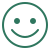

- Дерево решений не требует нормализации/стандартизации данных.
- Наличие пропусков не оказывает существенного влияния на построение дерева.
- За счёт своей простоты модель деревьев решений интуитивно понятна и легко объяснима даже людям, не разбирающимся в методе.
- Приятный побочный эффект построения дерева решений — получение значимости признаков. Однако коэффициенты значимости целиком и полностью зависят от сложности дерева.

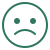

- В силу дискретной топологической структуры дерево не дифференцируется по параметрам: стандартные алгоритмы поиска параметров, такие как градиентный спуск, не работают. Приходится использовать полный перебор.
Примечание. Количество перебираемых вариантов можно сократить, используя методы динамического программирования.

- Так как метод является жадным, он долго обучается из-за полного перебора. Требует затрат больших вычислительных мощностей (по сравнению с другими алгоритмами). Особенно это ощутимо при большом количестве признаков на глубоких деревьях.
- Очень сильная склонность к переобучению. Необходим подбор внешних параметров: max_depth, min_sample_leaf и другие.
- Небольшое изменение в данных может заметно повлиять на структуру дерева.
- При работе с непрерывными числовыми признаками дерево делит их на категории и теряет информацию. Лучше всего дерево работает, если перевести числовые признаки в категориальные.

## **7. Введение в ансамбли: бэггинг. Случайный лес**

**Ансамблевые модели или просто ансамбли (ensembles)** — это метод машинного обучения, где несколько простых моделей (часто называемых «слабыми учениками») обучаются для решения одной и той же задачи и объединяются для получения лучших результатов.

Ансамбли — передовые алгоритмы для решения сложных задач машинного обучения.

Существует три проверенных способа построения ансамблей:

- **Бэггинг** — параллельно обучаем множество одинаковых моделей, а для предсказания берём среднее по предсказаниям каждой из моделей.
- **Бустинг** — последовательно обучаем множество одинаковых моделей, где каждая новая модель концентрируется на тех примерах, где предыдущая допустила ошибку.
- **Стекинг** — параллельно обучаем множество разных моделей, отправляем их результаты в финальную модель, и уже она принимает решение.

**БЭГГИНГ. ОСНОВНЫЕ ИДЕИ**

**Бэггинг (bagging)** — это алгоритм построения ансамбля путём параллельного обучения множества независимых друг от друга моделей.

В основе алгоритма лежит статистический метод, который называется бутстрэпом (bootstrap). Идея бутстрэпа заключается в генерации k выборок размера n (бутстрэп-выборок) из исходного набора данных размера m путём случайного выбора элементов с повторениями в каждом из наблюдений. 

Схематично работу метода можно представить следующим образом:

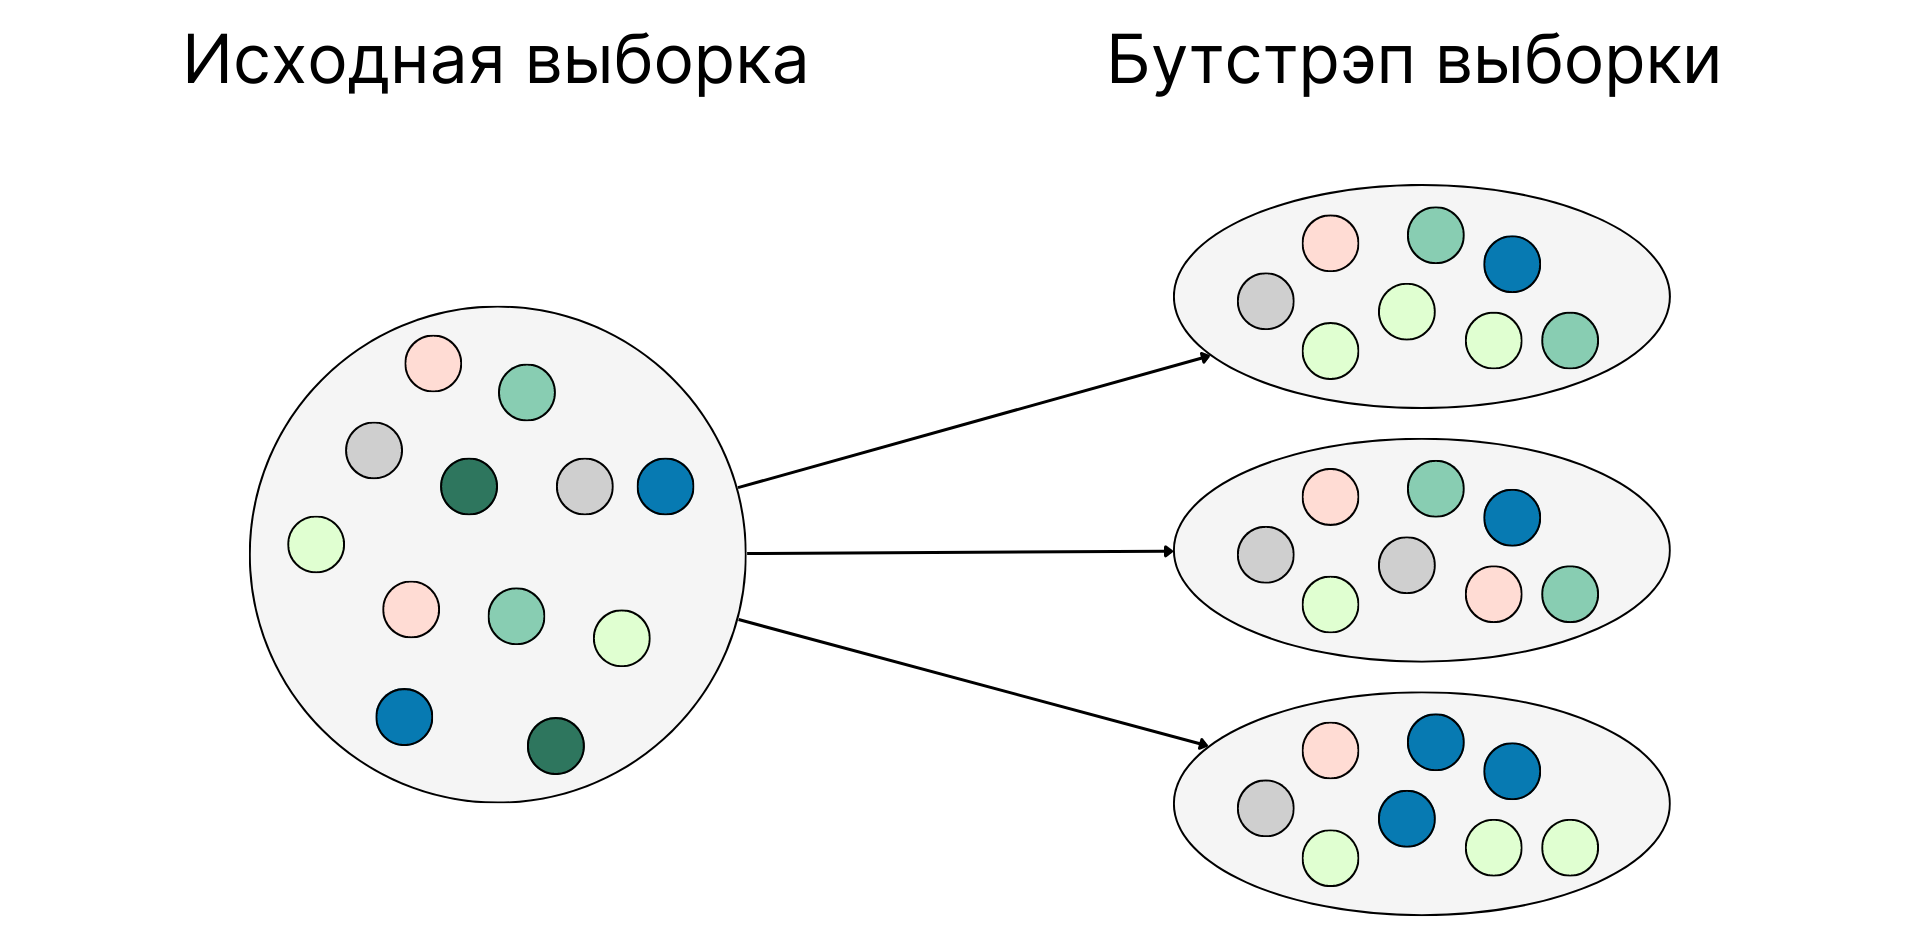

**Примечание.** Такие бутстрэп-выборки часто используются для оценки различных статистических показателей (например, разброса или доверительного интервала). Если вычислять статистические оценки на нескольких независимых выборках, то мы можем оценить их разброс. Поиск большого количества независимых выборок сложен в силу того, что для этого требуется слишком много данных. Поэтому мы используем бутстрэп, чтобы создать несколько выборок.

Давайте обучим k одинаковых моделей на каждой из сгенерированных выборок, сделаем предсказания, а затем усредним их. Так мы получим бэггинг.

Схематично такой подход можно описать следующим образом:

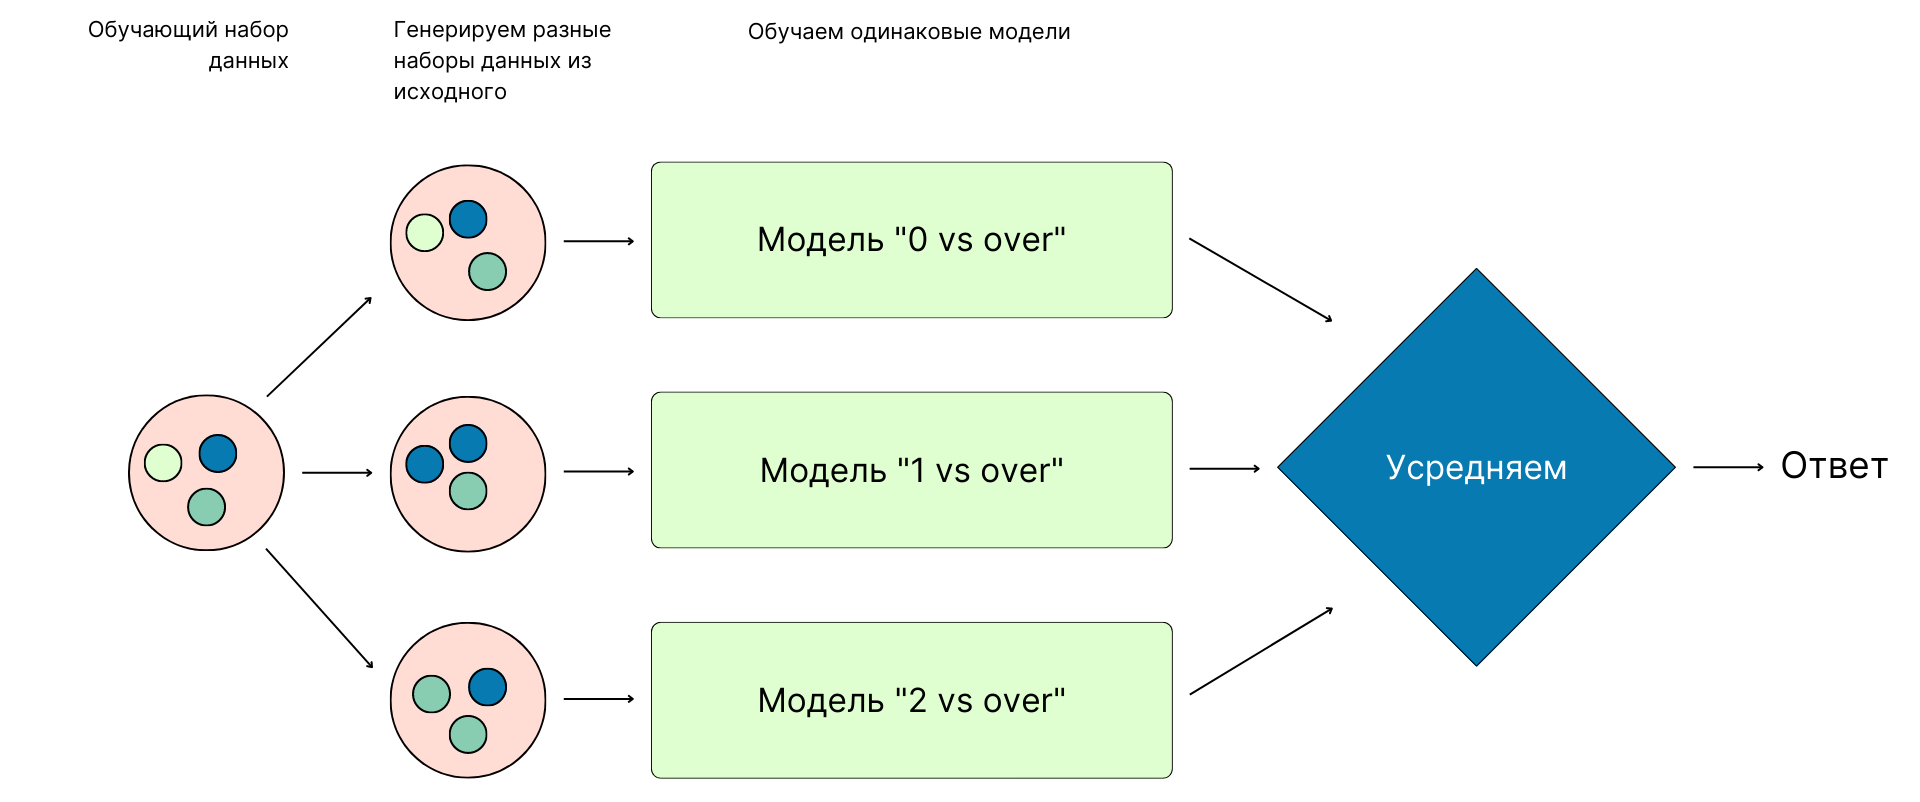

**Примечание.** В случае классификации «усреднение» означает мажоритарное голосование (принцип большинства голосов). То есть объект относится к тому классу, за который проголосовало большинство алгоритмов.

Важно отметить, что в бэггинге в голосовании принимает участие модель одного вида. Эта модель называется **базовой моделью (base model)**. Нельзя обучить на половине сгенерированных наборов данных логистические регрессии, а на второй половине — деревья решений.

**СЛУЧАЙНЫЙ ЛЕС**